In [5]:
#scikit-learn 버전 확인하기
import sklearn

print(sklearn.__version__)

1.6.1


# 02.첫번째 머신러닝-**붓꽃 품종 예측하기**



*   데이터 세트 생성 시, load_iris() 이용
*   DecisionTreeClassifier 적용



In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #데이터 셋에서 학습데이터와 테스트 데이터 분리

In [7]:
import pandas as pd

#붓꽃 데이터세트 로딩
iris = load_iris()

#iris.data는 Iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**Step.01:학습용 데이터와 테스트용 데이터 분리**

*   train_test_split() API를 활용. 무작위 분리
*   test_size = 0.2 => 테스트 데이터 20%, 학습 데이터 80%



코드 설명
*   iris_data: feature 데이터 세트
*   iris_label: label 데이터 세트
*   ramdom_state : 호출할 때마다 같은 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 발생값.숫자 임의로 부여 가능

*   X_train(학습용 피처 데이터 세트)
*   X_test(테스트용 피처 데이터세트)
*   y_train(학습용 레이블 데이터세트)
*   y_test(테스트용 레이블 데이터 세트)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state =11)

**Step.02:학습과 예측 수행-머신러닝 분류 알고리즘**

In [9]:
#DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

In [10]:
#학습 수행 #fit 메서드
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [11]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

**Step.03: 정확도 측정**
:실제 레이블 값과의 정확성 평가

In [12]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


# 03.사이킷런의 기반 프레임워크 익히기
**sklearn의 예제 데이터 키 값 지정하기**

-Bunch 클래스는 파이썬 딕셔너리 자료형과 유사함

-대부분의 dataset는 딕셔너리 형태의 값을 반환

In [13]:
#붓꽃 데이터 세트 생성
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [14]:
#dataset의 key 값을 확인
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print('feature_names의 type: ', type(iris_data.feature_names))
print('feature_names 의 shape: ', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape: ', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print(' data의 shape: ', len(iris_data.data))
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print(' target의 shape: ', len(iris_data.target))
print(iris_data.target)

feature_names의 type:  <class 'list'>
feature_names 의 shape:  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape:  3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape:  150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 

# 04.Model Selection 모듈 소개
**학습/테스트 데이터 세트 분리-train_test_split()**


In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


*   test_size: 테스트 데이터 세트 크기 샘플링/ default = 0.25 (25%)
*   train_size: 학습용 데이터 세트 크기 샘플링
*   shuffle: 전체 데이터 섞을지 여부/ default = True
*   random_state: 호출마다 동일한 학습/테스트 데이터 세트 생성하기 위해 주어지는 난수 값

*   train_test_split()의 반환값: 튜플







In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9556


**k 폴드 교차검증**


*   kFold와 StratifiedKFold 클래스 제공



In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state  = 156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5) #kfold 객체 생성
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [19]:
n_iter = 0

#KFold 객체의 split()를 호출하면 폴드별 학습/검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  #kfold.split()으로 반환된 인덱스를 이용해 학습/검증용 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  #반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)  #round(number, ndigits)는 number륵ㄹ ndigits 자릿수까지 반올림
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기:{2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)


#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기:120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기:120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기:120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기:120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기:120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


**Stratified K 폴드**


*StratifiedKFlod 클래스 이용

In [20]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


In [21]:
kfold = KFold(n_splits = 3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('##교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##교차검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
##교차검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
##교차검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


=>해석: 첫 번째 교차 검증에서는 학습 레이블의 1,2값이 각각 50개 추출/검증 레이블 0값이 50개 추출
->학습 레이블은 1,2이므로 0의 경우는 전혀 학습X and 검증 레이블을 0 밖에 없으므로 학습 모델은 절대 0을 예측 못함

In [22]:
#Statified K fold 사용
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index,test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('##교차검증: {0]}.format(n_iter)')
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())


##교차검증: {0]}.format(n_iter)
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
##교차검증: {0]}.format(n_iter)
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
##교차검증: {0]}.format(n_iter)
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


=>해석: 첫번째 교차검증에서 100개의 학습 레이블(0,1,2값이 각각 34, 33,33개) 할당, 50개의 검증 레이블 (0,1,2값이 각각 17, 17, 16개) 할당
->0,1,2값을 모두 할당

In [23]:
dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

#StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  #반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

#교차 검증별 정확도 및 평균 정확도 개선
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


**cross_val_score()**

:교차검증을 편리하게 수행할 수 있게 해주는 API


아래 KFold 과정을 한번에 수행함
1.   폴드 세트 설정
2.   for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
3.   반복적으로 학습과 예측을 수행하고 예측 성능 반환






In [24]:
#cross_val_scoer() API의 선언 형태
#cross_val_score(estimator, X, y = None, scoring = None, cv = None, n_jobs = 1, verbose =0, fit_params= None, pre_dispatch = '2*n_jobs')

* estimator, X, y, scoring, cv가 주요 파라미터

* estimator: 분류 알고리즘 클래스인 Classifier 또는 Regressor
* X: 피처 데이터 세트
* y: 레이블 데이터 세트
* scoring: 예측 성능 평가 지표
* cv: 교차 검증 폴드 수
* 반환값: scoring 파라미터로 지정된 성능지표 측정값을 배열형태로 반환

* classifier => Stratified K Fold 방식으로 학습/데이터 세트 분할
* Regression => K Fold 방식으로 분할

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3) #API 내부에서 fit, predict, evaluation
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


비슷한 API => **cross_validate()**

: 여러 개의 평가 지표를 반환할 수 있음

: 학습 데이터에 대한 성능 평가 지표와 수행 시간 제공

**GridSearhCV-교차검증과 최적 하이퍼 파라미터 튜닝을 한번에**

:하이퍼 파라미터 최적화를 실행할 수 있는 방안을 제공하는 API

:여러 종류의 하이퍼 파라미터를 다양하게 테스트 but, 수행시간 오래 걸림

생성자로 들어가는 파라미터
* estimator: classifier, regressor, pipeline 사용됨
* param_grid: key + 리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
* scoring: 예측 성능을 측정할 평가 방법 지정. 별도의 성능 평가 지표함수도 지정 가능
* cv: 교차검증 위해 분할되는 학습/테스트 세트의 개수 지정
* refit: True => 최적의 파라미터 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습. default = True

In [26]:
grid_parameters = {'max_depth': [1,2,3], 'min_samples_split':[2,3]}
#3*2로 순차적으로 바꿔서 실행

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state  = 121)

dtree = DecisionTreeClassifier()

###파라미터를 딕셔너리 형태로 지정
parameters = {'max_depth':[1,2,3], 'min_samples_split': [2,3]}

In [28]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
grid_dtree = GridSearchCV(dtree, param_grid =grid_parameters, cv = 3, refit = True)

#param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


=>결과 해석: max_depth와 min_samples_split을 순차적으로 총 6번 변경하며 실행한 각 결과값

* rank_test_score: 결과 예측 성능 순위를 의미함. index 4와 5가 공동 1위.
* split#_test_score: 각 폴딩 세트에서의 성능 수치
* mean_test_score: 각 폴딩 세트에서의 성능 수치의 평균

In [29]:
#최적의 하이퍼 파라미터의 값과 그때의 결과값을 기록할 수 있음
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [30]:
#GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


# 데이터 전처리
**레이블 인코딩**

* LabelEncoder 클래스로 구현됨

In [31]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [32]:
print('encoding 클래스:', encoder.classes_)

encoding 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [33]:
#디코딩
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


**원-핫 인코딩**

자료구조 개념
* 희소행렬: 대부분의 항이 '0'으로 이루어진 행렬.

->공간의 비효율성 막기 위해 2차원 배열로 변환. 0이 아닌 원소를 (행, 열) 위치로 호출 가능해짐

* 밀집 행렬: 대부분의 요소가 '0'이 아닌 값을 가진 행

In [34]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#2차원 ndarry로 변환
items = np.array(items).reshape(-1, 1)

#원-핫 인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬. toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


**get_dummies()**

:원-핫 인코딩을 더 쉽게 지원하는 API

In [35]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df, dtype = int) #여기서 dtype = int로 해줘야 0과 1로 나온다. 아니면 boolean 값으로 나옴.

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


**피처 스케일링과 정규화**

* 대표적인 피처 스케일링 클래스 StandardScaler와 MinMaxScaler


**StandardScaler**

* 표준화 지원 클래스
* RBF 커널을 이용하는 서포트 벡터 머신이나 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됨.

In [36]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [37]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


=> 평균 값이 0에 수렴하는 값으로, 분산은 1에 아주 가까운 값으로 변환

**MinMaxScaler**

: 데이터 값을 0과 1 사이의 범위 값으로 변환.(음수값의 경우 -1~1로 변환)

In [38]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**학습/테스트 데이터의 스케일링 변환 시 유의점**

* Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 이 결과를 이용해서 테스트 데이터세트에서 transform() 변환을 적용해야함.
==학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용.

* 새로운 스케일링 기준 정보를 테스트 데이터 세트에 만들면 예측 결과 왜곡 생길 수 있음.

In [39]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0~10까지, 테스트 데이터는 0~5까지 값을 가지는 데이터 세트 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상의 데이터만 가능. reshape(-1,1) 필요
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1, 1)

In [40]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [41]:
#테스트 데이터 세트를 변환. fit()을 호출해 스케일링 기준 정보 재적용 후 transform() 수행한 결과 확인
scaler.fit(test_array)

#1/5로 변환
test_scaled = scaler.transform(test_array)

#변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [42]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#테스트 데이터에 fit()을 호출하지 않고 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()이용
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


* fit_transform()을 이용할 때도 테스트 데이터에서는 사용X

* 학습/테스트 데이서 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링 적용.

# 06. 사이킷런으로 수행하는 타이타닉 생존자 예측


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [44]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info)


 ### 학습 데이터 정보 ### 

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..             

In [45]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


/tmp/ipython-input-2166769561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
/tmp/ipython-input-2166769561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [46]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [47]:
#Cabin의 경우 앞 알파벳만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [48]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**Seaborn 패키지로 시각화**


<Axes: xlabel='Sex', ylabel='Survived'>

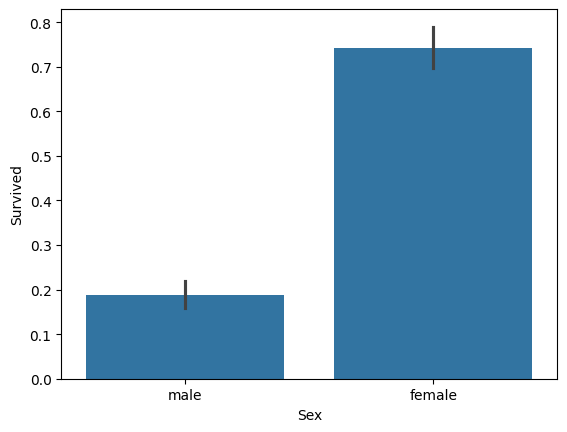

In [49]:
#t성별 생존율
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

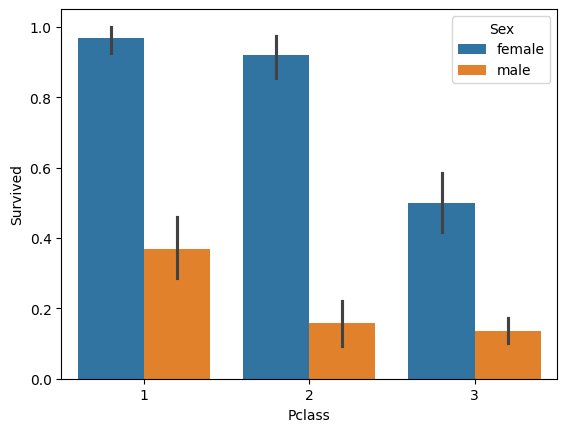

In [50]:
#객실 등릅 별 성별에 따른 생존 확률
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

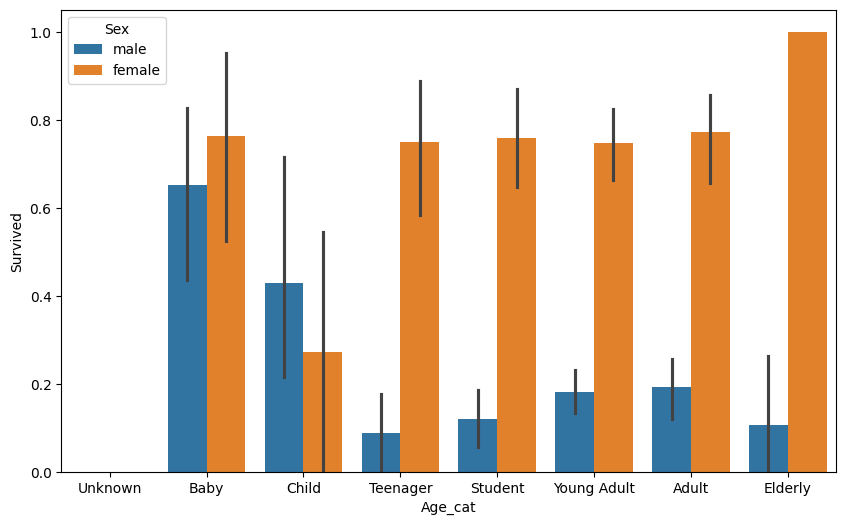

In [51]:
#나이에 따른 생존 확률
def get_category(age):
  cat = ''
  if age <= -1:cat = 'UnKnown'
  elif age <= 5: cat = 'Baby'
  elif age <=12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <=35 : cat = 'Young Adult'
  elif age<= 60: cat ='Adult'
  else : cat = 'Elderly'

  return cat

#막대 그래프의 크기 figure
plt.figure(figsize = (10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

In [52]:
#문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [53]:
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df # Return the modified DataFrame

#ML 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df # Return the modified DataFrame

#레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df # Return the modified DataFrame

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df) # Assign the result of fillna (which is the modified df)
  df = format_features(df) # Assign the result of format_features
  df = drop_features(df) # Assign the result of drop_features
  return df

In [54]:
#원본 데이터 재로딩, 피처/레이블 데이터 세트 추출
titanic_df = pd.read_csv(r'train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

# Apply transformations without reassigning df in transform_features
X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

/tmp/ipython-input-3195890318.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3195890318.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

* 결정트리 =>DecisionTreeClassifier
* 랜덤 포레스트 => RandomForestClassifier
* 로지스틱 회귀 => LogisitcRegression


 LogisticRegrssion의 생성인자: solver = 'liblinear'

 => 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정 결정트리 =>DecisionTreeClassifier
 * 랜덤 포레스트 => RandomForestClassifier
 * 로지스틱 회귀 => LogisitcRegression
  
   
    LogisticRegrssion의 생성인자: solver = 'liblinear'

     => 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForesteClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


In [56]:
#교차검증으로 결정트리 모델 평가
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits = folds)
  scores = []

  #KFold 교차 검증
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    #Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차검증{0} 정확도: {1:.4f}".format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print("평균 정확도:{0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds = 5)

교차검증0 정확도: 0.7542
교차검증1 정확도: 0.7809
교차검증2 정확도: 0.7865
교차검증3 정확도: 0.7697
교차검증4 정확도: 0.8202
평균 정확도:0.7823


In [57]:
#cross_val_score() 이용해 수행
#StratifiedKFold를 사용하기에 K폴드의 평균 정확도와 차이 존재
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):  #enumerate함수는 인덱스와 원소로 이루어진 튜플을 반환
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도:{0:.4f}".format(np.mean(scores)))


교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도:0.7879


In [58]:
#GridSearchCV를 이용
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:0.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


# **파머완 3장**

# 정확도


In [59]:
#이진 분류에 사용되는 정확도 성능 지표의 왜곡
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  #fit() 메서드는 아무것도 학습하지 않음
  def fit(self, X, y= None):
    pass
  #predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range (X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1

    return pred

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분학
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

#위에서 생성한 Dummy Classifier 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


/tmp/ipython-input-3195890318.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3195890318.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

=>불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가지표X


ex) 100개 데이터 중 90개 데이터 레이블이 0, 10개의 데이터 레이블이 1이라고 하면 무조건 0으로 예측 결과 반환 시 정확도 90%로 나옴

**정확도 지표 적용 문제 2**
* MNIST 데이터 세트 변환->불균형한 데이터 세트로 만듦
* MNIST 데이터 세트: 0~9까지 숫자 이미지의 픽셀 정보를 가짐. 숫자 digit를 예측하는데 사용
* load_digits() API 통해 MNIST 데이터 세트 제공
* 예)에서 레이블 값이 7인 것만 True, 나머지는 모두 False로 변환해 이진분류

In [61]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)

#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)


In [62]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


=>predict의 결과를 np.zeros()로 모두 0값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도 90&==>심히 이상함.

# 02.오차행렬

*confusion_matrix() API 제공

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)
#TN은 array[0,0], FP는 array[0,1], FN은 array[1,0], TP는 array[1,1]
#MyFakeClassifier는 무조건 Negative로 예측하는 Classifier였기에 값이 이렇게 나옴

array([[405,   0],
       [ 45,   0]])

* 정밀도 계산 : precision_score()
* 재현율 계산: recall_score()
* 모든 성능 평가지표를 호출하는 : get_clf_eval() 함수 만들기

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

* LogisticRegression 객체의 생성 인자로 입력되는 solver = 'liblinear'는 로지스틱 회귀의 최적화 알고리즘 유형 지정.

=> solver는 liblinear 가 성능이 좋음. solver의 기본값 lbfg이며 데이터 세트가 상대적으로 크고 다중 분류인 경우 적합

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.20, random_state =11)
lr_clf = LogisticRegression(solver = 'liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


/tmp/ipython-input-3195890318.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3195890318.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**정밀도/재현율 트레이드오프**
* predict_proba()

In [66]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

#예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


사이킷런의 predict()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임계값을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정.

=>구현을 위해 Binarizer 클래스 이용

In [67]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2], [2,0,0], [0,1.1,1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

#의사 코드. 로지스티회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 같음
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

#predict_proba() 반환값의 두번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [68]:
#Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)
#재현율 올라가고 정밀도 떨어짐
#예측값 결정 기준 떨어짐

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [69]:
#임계값을 0.4~0.6까지 0.05씩 증가시키며 평가지표 조사
#임계값에 따른 평가지표별 결
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict =binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


이와 유사한 **precision_recall_curve()** API 있음.

In [72]:
from sklearn.metrics import precision_recall_curve

#레이블 값 1일때의 예측 확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 165건이므로 샘플로 10건만 추출, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율의 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


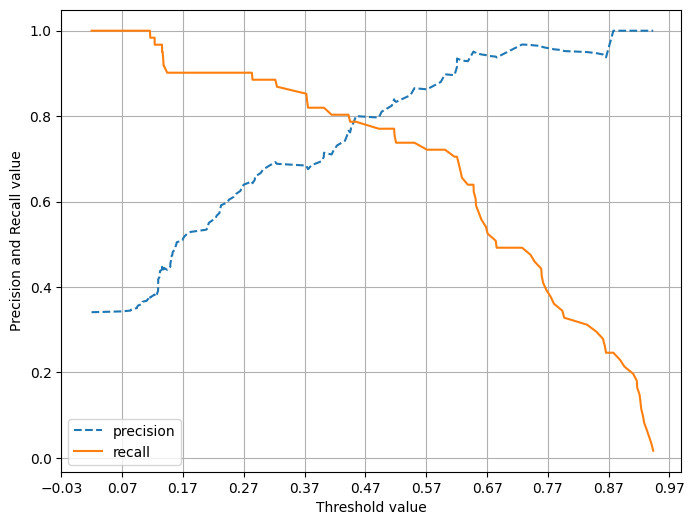

In [80]:
#시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label ='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()


precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1 ] )

# 04.f1-Score
* f1_score() API


In [87]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어:{0:.4f}'.format(f1))

F1 스코어:0.7966


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  #roc_auc = roc_auc_score(y_test, pred_proba) # This line was causing the error as pred_proba was not passed
  print('오차 행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall, f1))

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict =binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

위 코드의 출력결과 정리=>

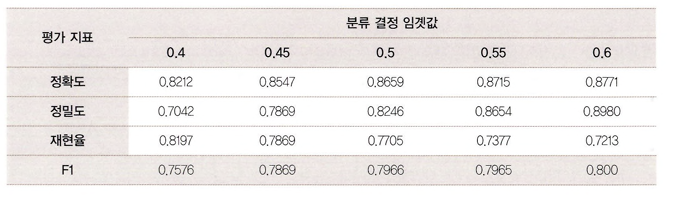

# 05.ROC 곡선 AUC
* roc_curve() API

In [91]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열에서 샘플로 데이터를 추출, 임곗값을 5 단계로 추출
#threshold[0]은 max(예측확률) +1 로 임의 설정됨. 이를 제외하기 위해 np,arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임계값에 따른 ftr, tpr 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


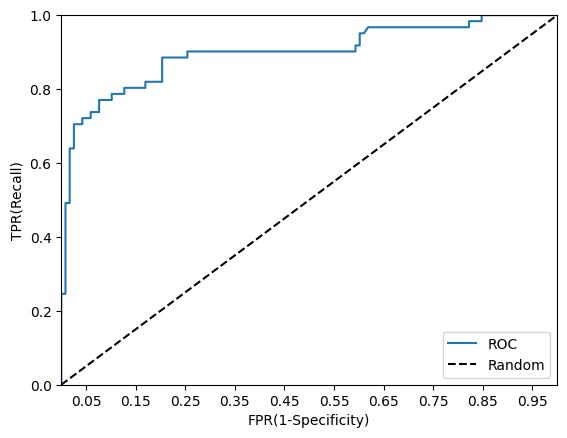

In [94]:
#시각화
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label = 'ROC')
  plt.plot([0,1], [0,1], 'k--', label = 'Random')

  #FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1);plt.ylim(0,1)
  plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [95]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AOU 값: {0:.4f}'.format(roc_score))

ROC AOU 값: 0.8987


In [97]:
def get_clf_eval(y_test, pred=None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 06.피마 인디언 당뇨병 예측
* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린
* BMI: 체질량 지수
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0 or 1)


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [100]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도:0.7727, 정밀도: 0.7111, 재현율: 0.5926, f1: 0.6465, AUC:0.8083


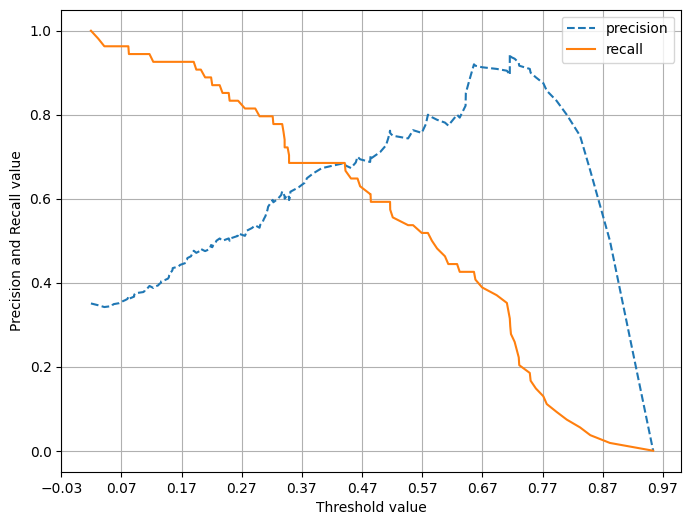

In [104]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [105]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min 값이 0인 feature가 많음. Glucose 수치 0? 말이 안된다

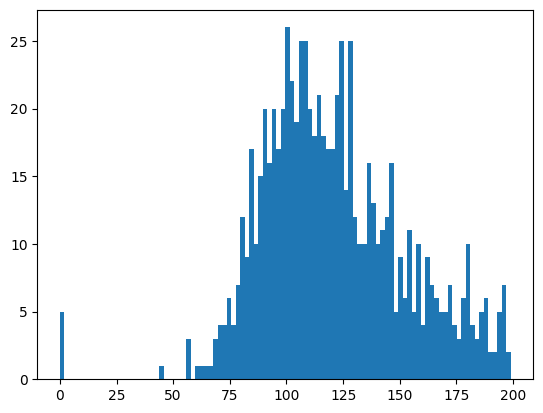

In [107]:
#확인차 시각화
plt.hist(diabetes_data['Glucose'], bins = 100)
plt.show()

=>0값이 5개 존재

0값의 건수 및 전체 데이터 건수 대비 몇퍼센트 비율로 존재하는지 확인

In [108]:
#0값을 검사
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [111]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [112]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[89 11]
 [19 35]]
정확도:0.8052, 정밀도: 0.7609, 재현율: 0.6481, f1: 0.7000, AUC:0.8461


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
#임계값 변화
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[68 32]
 [10 44]]
정확도:0.7273, 정밀도: 0.5789, 재현율: 0.8148, f1: 0.6769
임곗값: 0.33
오차 행렬
[[71 29]
 [12 42]]
정확도:0.7338, 정밀도: 0.5915, 재현율: 0.7778, f1: 0.6720
임곗값: 0.36
오차 행렬
[[74 26]
 [14 40]]
정확도:0.7403, 정밀도: 0.6061, 재현율: 0.7407, f1: 0.6667
임곗값: 0.39
오차 행렬
[[76 24]
 [14 40]]
정확도:0.7532, 정밀도: 0.6250, 재현율: 0.7407, f1: 0.6780
임곗값: 0.42
오차 행렬
[[79 21]
 [16 38]]
정확도:0.7597, 정밀도: 0.6441, 재현율: 0.7037, f1: 0.6726
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도:0.7857, 정밀도: 0.7059, 재현율: 0.6667, f1: 0.6857
임곗값: 0.48
오차 행렬
[[86 14]
 [19 35]]
정확도:0.7857, 정밀도: 0.7143, 재현율: 0.6481, f1: 0.6796
임곗값: 0.5
오차 행렬
[[89 11]
 [19 35]]
정확도:0.8052, 정밀도: 0.7609, 재현율: 0.6481, f1: 0.7000


In [118]:
#임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

#위에서 구한 lr_clf의 predict_proba()예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[86 14]
 [19 35]]
정확도:0.7857, 정밀도: 0.7143, 재현율: 0.6481, f1: 0.6796
